In [1]:
import numpy as np
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from sklearn.cluster import KMeans
import time
import warnings
warnings.filterwarnings('ignore')
import progressbar
from keras.datasets import mnist

In [2]:
df = np.load("mnist_compressed.npz")
train_images = df['train_images']
train_labels = df['train_labels']
test_images = df['test_images']
test_labels = df['test_labels']

In [3]:
(train_images_1, train_labels_1), (test_images_1, test_labels_1) = mnist.load_data()

In [4]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)
print(train_images_1.shape)
print(train_labels_1.shape)
print(test_images_1.shape)
print(test_labels_1.shape)

(60000, 28, 56)
(60000,)
(10000, 28, 56)
(10000,)
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


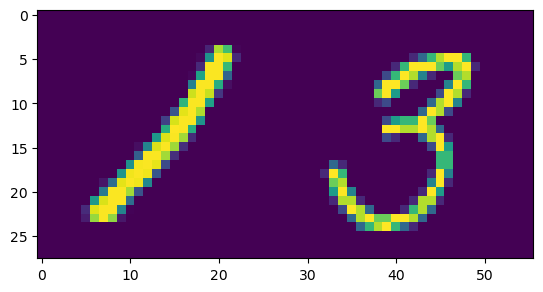

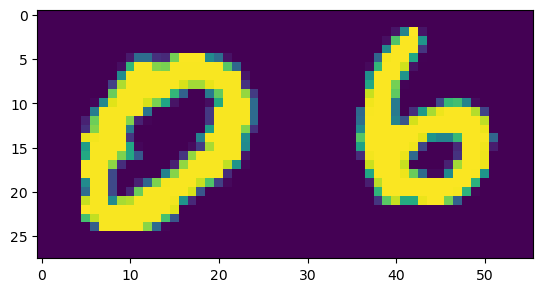

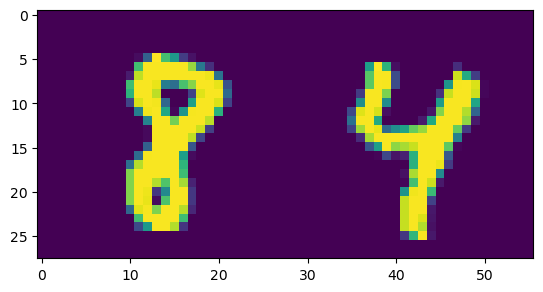

In [5]:
for i in range(0,3):
    n = random.randint(0,59999)
    plt.imshow(train_images[n], interpolation='nearest')
    plt.show()

In [6]:
layers = [tf.keras.Input(shape=(28,28,1)), Conv2D(8,5), MaxPool2D(), Conv2D(8,3), MaxPool2D(), Flatten(), Dense(1000, activation='relu'), Dense(100, activation= 'softmax')]
model = tf.keras.models.Sequential(layers)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 8)           0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200)               0         
                                                                 
 dense (Dense)               (None, 1000)              2

In [7]:
n_epochs = 10
model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images_1, train_labels_1, epochs=n_epochs, validation_data = (test_images_1, test_labels_1))

Epoch 1/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.5038 - accuracy: 0.9347 - val_loss: 0.1275 - val_accuracy: 0.9668
Epoch 2/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1029 - accuracy: 0.9735 - val_loss: 0.1166 - val_accuracy: 0.9722
Epoch 3/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.1004 - accuracy: 0.9746 - val_loss: 0.1069 - val_accuracy: 0.9707
Epoch 4/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0879 - accuracy: 0.9771 - val_loss: 0.1158 - val_accuracy: 0.9688
Epoch 5/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.0763 - accuracy: 0.9807 - val_loss: 0.1103 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0706 - accuracy: 0.9831 - val_loss: 0.1012 - val_accuracy: 0.9758
Epoch 7/10
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0662 - accuracy: 0.9848 - val_loss: 0.1072 -


Accuracy on the final epoch of training was 98.64%


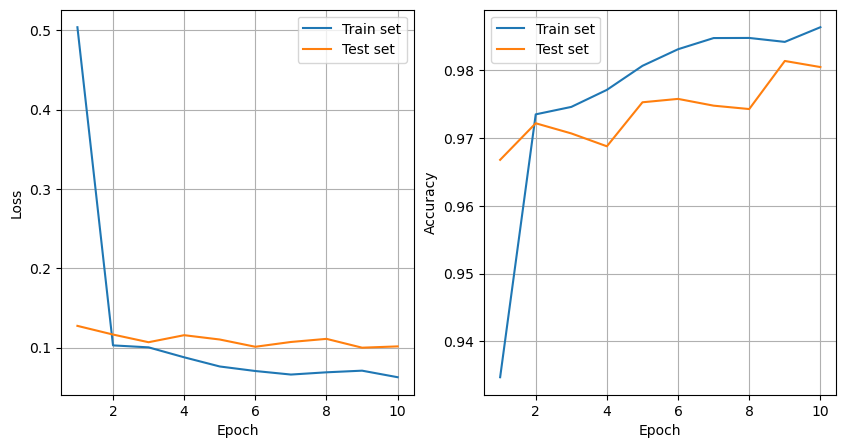

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1, n_epochs+1), history.history['loss'], label='Train set')
plt.plot(np.arange(1, n_epochs+1), history.history['val_loss'], label='Test set')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(np.arange(1, n_epochs+1), history.history['accuracy'], label='Train set')
plt.plot(np.arange(1, n_epochs+1), history.history['val_accuracy'], label='Test set')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
print(f"\nAccuracy on the final epoch of training was {100*history.history['accuracy'][-1]:0.2f}%")

In [100]:
def cluster(index):
    test = train_images[index]
    i, j = np.ogrid[(*map(slice, test.shape),)]
    points = np.argwhere((test>0))
    clusterer = KMeans(n_clusters=2, n_init='auto')
    clusters = clusterer.fit_predict(points)
    return checkSplit(points, clusters)


In [98]:
def checkSplit(points, clusters):
    clusters  = np.array(clusters, copy=False, subok=True, ndmin=2).T
    total = np.concatenate([points, clusters], axis=1)
    p0 = total[total[:, 2] == 0, :]
    p1 = total[total[:, 2] == 1, :]
    max0 = max(p0[:,1])
    max1 = max(p1[:,1])
    min0 = min(p0[:,1])
    min1 = min(p1[:,1])
    if (max0 < min1):
        return round((max0 + min1)/2)
    elif (max1 < min0):
        return round((max1 + min0)/2)
    else:
        print("Bad")
        return -1
                    

In [103]:
n_trials = 59999
widgets = [progressbar.Percentage(), " ", progressbar.Bar(), " ", progressbar.ETA(), ]
bar = progressbar.ProgressBar(maxval=(n_trials-1), widgets = widgets).start()

splitDim = []
for i in range(n_trials):
    dim = cluster(i)
    if dim == "None":
        print("Non seperable at: " + str(i))
    else:
        splitDim.append(dim)
    bar.update(i)

splitDim

  0% |                                                         | ETA:   1:19:00

KeyboardInterrupt: 